In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
df = pd.read_csv("ipl.csv")
df.head()

,M_id,Date,Venue,Bat_team,Bowl_team,Batsman,Bowler,Runs,Wickets,Overs,Runs_last_5,Wickets_last_5,Striker,Non-striker,Total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [2]:
remove_columns = ['Striker', 'Non-striker', 'M_id', 'Batsman', 'Bowler']
df.drop(labels = remove_columns, axis=1, inplace=True)

In [3]:
df['Bat_team'].unique()
df['Venue'].unique()

#to see most used stadiums
df['count'] = 1
df.groupby(['Venue']).count()['count']

Venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [4]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

current_Venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']

df = df[(df['Bat_team'].isin(current_teams)) &(df['Bowl_team'].isin(current_teams))]
df = df[(df['Venue'].isin(current_Venues))]

# Removing the first 5 Overs data in every match
df = df[df['Overs']>=5.0]

In [5]:
# Converting 'date' from string into datetime object
from datetime import datetime

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
final_df = pd.get_dummies(data=df, columns=['Bat_team', 'Bowl_team', 'Venue'])


In [6]:
#rearranging the columns
final_df = final_df[['Date','Bat_team_Chennai Super Kings', 'Bat_team_Delhi Daredevils',
       'Bat_team_Kings XI Punjab', 'Bat_team_Kolkata Knight Riders',
       'Bat_team_Mumbai Indians', 'Bat_team_Rajasthan Royals',
       'Bat_team_Royal Challengers Bangalore', 'Bat_team_Sunrisers Hyderabad',
       'Bowl_team_Chennai Super Kings', 'Bowl_team_Delhi Daredevils',
       'Bowl_team_Kings XI Punjab', 'Bowl_team_Kolkata Knight Riders',
       'Bowl_team_Mumbai Indians', 'Bowl_team_Rajasthan Royals',
       'Bowl_team_Royal Challengers Bangalore',
       'Bowl_team_Sunrisers Hyderabad', 'Venue_Eden Gardens',
       'Venue_Feroz Shah Kotla','Venue_M Chinnaswamy Stadium',
       'Venue_MA Chidambaram Stadium, Chepauk','Venue_Sawai Mansingh Stadium',
       'Venue_Punjab Cricket Association Stadium, Mohali',
       'Venue_Rajiv Gandhi International Stadium, Uppal',
       'Venue_Wankhede Stadium', 'Overs','Runs', 'Wickets', 'Runs_last_5', 'Wickets_last_5',
       'Total']]

final_df.head()

,Date,Bat_team_Chennai Super Kings,Bat_team_Delhi Daredevils,Bat_team_Kings XI Punjab,Bat_team_Kolkata Knight Riders,Bat_team_Mumbai Indians,Bat_team_Rajasthan Royals,Bat_team_Royal Challengers Bangalore,Bat_team_Sunrisers Hyderabad,Bowl_team_Chennai Super Kings,...,Venue_Sawai Mansingh Stadium,"Venue_Punjab Cricket Association Stadium, Mohali","Venue_Rajiv Gandhi International Stadium, Uppal",Venue_Wankhede Stadium,Overs,Runs,Wickets,Runs_last_5,Wickets_last_5,Total
32,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,False,5.1,61,0,59,0,222
33,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,False,5.2,61,1,59,1,222
34,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,False,5.3,61,1,59,1,222
35,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,False,5.4,61,1,59,1,222
36,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,False,5.5,61,1,58,1,222


In [7]:

# Splitting the data into train and test set
X_train = final_df.drop(labels='Total', axis=1)[final_df['Date'].dt.year<=2016]
X_test = final_df.drop(labels='Total', axis=1)[final_df['Date'].dt.year>=2017]

y_train = final_df[final_df['Date'].dt.year<=2016]['Total'].values
y_test = final_df[final_df['Date'].dt.year>=2017]['Total'].values

# Removing the 'date' column
X_train.drop(labels='Date', axis=True, inplace=True)
X_test.drop(labels='Date', axis=True, inplace=True)

In [8]:
# --- Model Building ---
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction = lasso_regressor.predict(X_test)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+06, tolerance: 1.783e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.073e+06, tolerance: 1.849e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

{'alpha': 1}
-343.1309689444174


In [9]:
import numpy as np
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Print the random grid
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)
prediction = rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}


MAE: 15.607461428997997
MSE: 386.324716340193
RMSE: 19.65514478044344


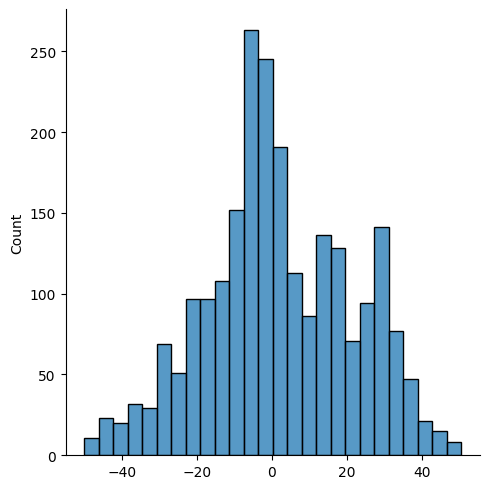

In [11]:

from sklearn import metrics


print(sns.displot(y_test-prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 15.607461428997997
MSE: 386.324716340193
RMSE: 19.65514478044344


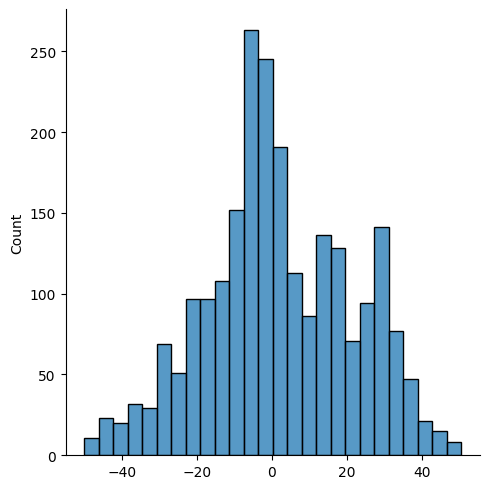

In [12]:
print(sns.displot(y_test-prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [13]:
# Creating a pickle file for the classifier
filename = 'imp.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))